Frequency Domain Filtering

low-, high- and band-pass filters and noise removal

This week we will be moving away from convolution as a way to alter signals
and instead we will be using the frequency domain. The first tasks will help you
familiarize yourself with frequency domain and get a parallel how filtering works
in it, the last task will let you apply these filters on a more realistic case.

In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

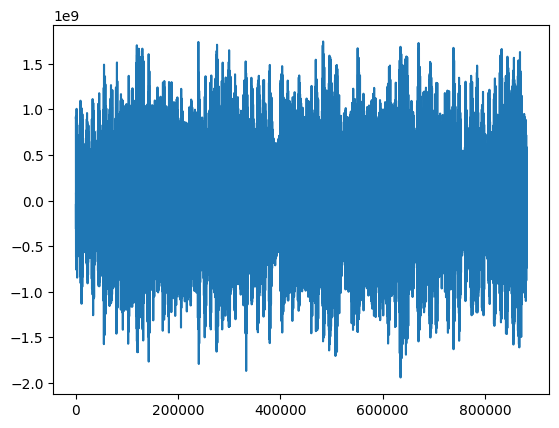

In [3]:
#read and save audio file
(Fs,raw) = wavfile.read("Adele.wav")  #(Fs,raw) = wavfile.read("file_in.wav")
time_dom = np.array(raw)
plt.plot (time_dom)
plt.show()

In [4]:
wavfile.write("Adele_out.wav", Fs, time_dom.astype("int32"))    #wavfile.write("file_out.wav", Fs, time_dom.astype("uint8"))
#for 16 and 32 bit use int16 and int32

C:\Users\Nikita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


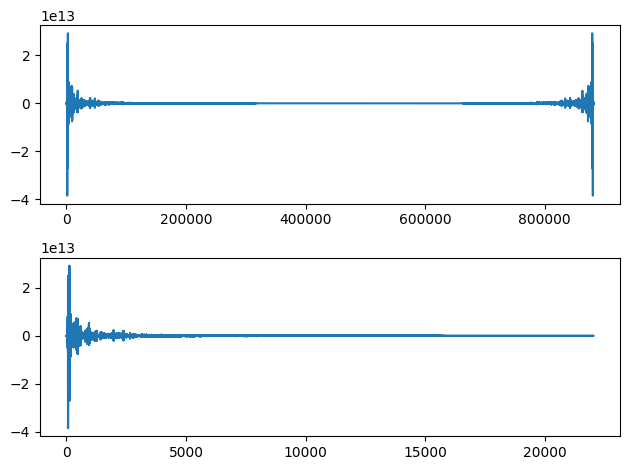

In [5]:
#convert a time domain signal to frequency domain using fast fourier transform and get the frequency range
freq_dom = np.fft.fft(time_dom) #fft library and fft (fast fourier transform) function
freq_range = np.abs(np.fft.fftfreq(time_dom.shape[-1], d=1/Fs))
plt.subplot(211)
plt.plot(freq_dom)
#plt.xscale('log')
plt.subplot(212)
plt.plot(freq_range, freq_dom)
#plt.xscale('log')
plt.tight_layout()
plt.show()


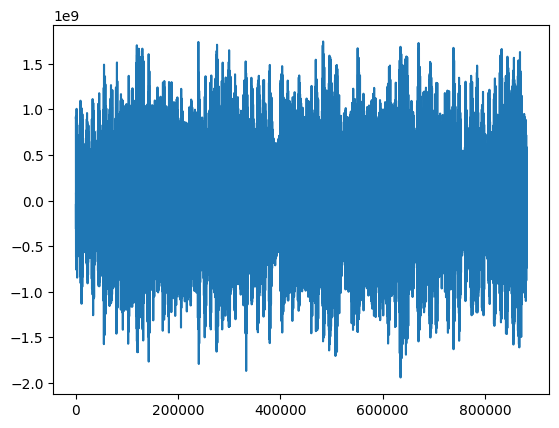

In [6]:
#convert a frequency domain signal to time domain using
#inverse fast fourier transform
time_dom1 = np.fft.ifft(freq_dom)
#for 16 and 32 bit don't use np.abs()

plt.plot(time_dom1)
plt.show()

In [7]:
wavfile.write("Adele_out2.wav", Fs, time_dom1.astype("int32"))

C:\Users\Nikita\AppData\Local\Temp\ipykernel_10928\2294148913.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write("Adele_out2.wav", Fs, time_dom1.astype("int32"))


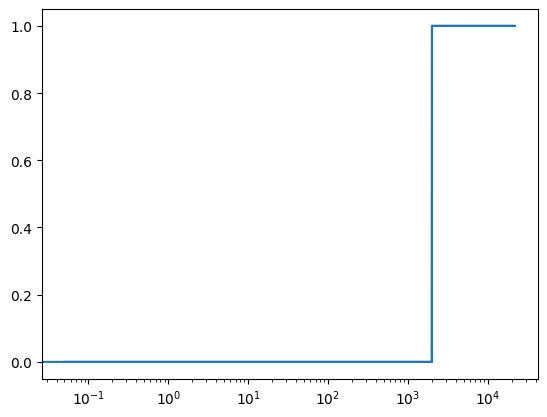

In [8]:
f_filter = ((freq_range - 2000) > 0 ) * 1 #true/false array multiplyed by 1 (makes an array of boolean numbers)
plt.plot(freq_range, f_filter)
plt.xscale("log")
plt.show()

In [9]:
freq_dom1 = freq_dom

freq_dom1 *= f_filter

time_dom2 = np.fft.ifft(freq_dom1)


In [10]:
wavfile.write("Adele_out3.wav", Fs, time_dom.astype("int32"))

In [18]:
# High-pass filter
C = 2000  # Cut-off frequency
f_filter = (freq_range > C) * 1

In [19]:
# Gaussian band-pass filter
U = 2000  # Mean of the Gaussian function
d = 200  # Standard deviation of the Gaussian function
f_filter1 = 1 / (d * (2 * np.pi) ** 0.5) * np.exp(-0.5 * ((freq_range - U) / d) ** 2)
f_filter1 *= d / 0.4

In [20]:
freq_dom3 = freq_dom
freq_dom3 *= f_filter

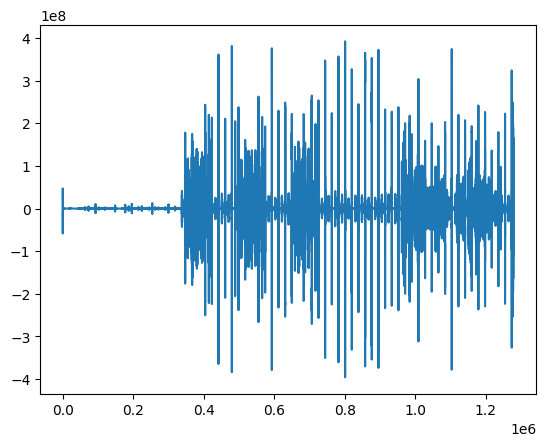

In [21]:
time_dom_filtered = np.fft.ifft(freq_dom).real
wavfile.write("Adele_out5.wav", Fs, time_dom_filtered.astype("int32"))
plt.plot(time_dom_filtered)
plt.show()

In [22]:
# Filter to remove specific frequency range
f_filter = ((freq_range < 100) | (freq_range > 1000)) * 1
freq_dom *= f_filter

Frequency range filtering and convolutional filtering are different techniques used for different purposes. Frequency range filtering operates in the frequency domain and modifies the amplitude or phase of specific frequency components of a signal, while convolutional filtering operates in the time domain and applies a filter kernel to the signal to extract features.

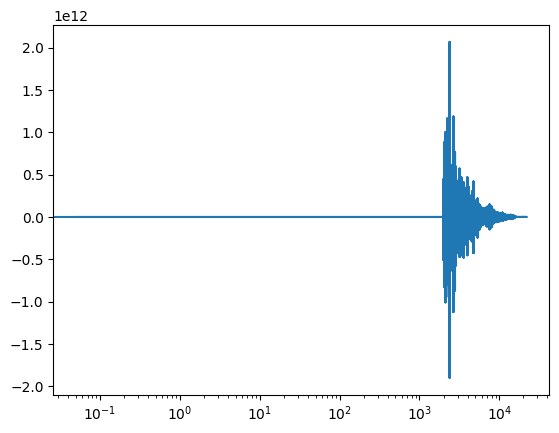

In [11]:
plt.plot(freq_range, freq_dom)
plt.xscale('log')
plt.show()

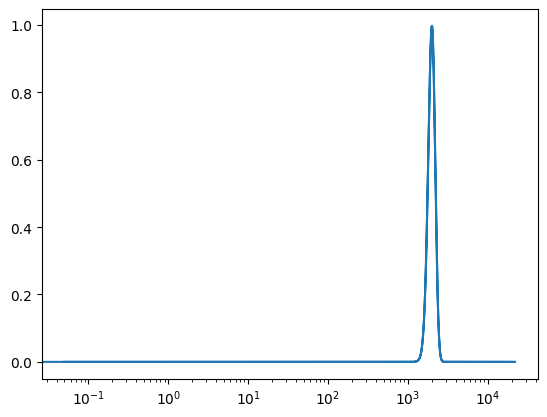

In [12]:
U = 2000 #U = 1
d = 200 #d = 1
f_filter = 1/(d*(2*np.pi)**0.5)*np.exp(-0.5*((freq_range-U)/d)**2)

f_filter *= d/0.4

plt.plot(freq_range, f_filter)
plt.xscale('log')
plt.show()

freq_dom2 = freq_dom
freq_dom2 *= f_filter
time_dom3 = np.fft.ifft(freq_dom2)

In [13]:
wavfile.write("Adele_out4.wav", Fs, time_dom.astype("int32"))

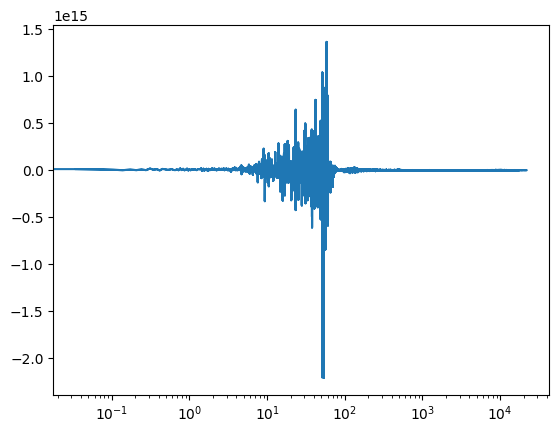

In [14]:
(Fs, raw) = wavfile.read("culture64bit.wav")
time_dom = np.array(raw)

freq_dom = np.fft.fft(time_dom)
freq_range = np.abs(np.fft.fftfreq(time_dom.shape[-1], d=1/Fs))

plt.plot(freq_range, freq_dom)
plt.xscale('log')
plt.show()

The audio file looks like it is corrupted. Corruption in an audio signal may result in various types of distortions, artifacts, or discontinuities in the waveform that are not consistent with the expected characteristics of a clean audio signal. And basically that is perfectly describes what is happening in this particular audio.

In general, filtering techniques such as notch filters, bandpass filters, or high-pass/low-pass filters can be used to attenuate or remove certain frequency components associated with the corruption.

In [15]:
f_filter = (freq_range>100)*1
freq_dom *= f_filter

time_dom = np.fft.ifft(freq_dom)

In [16]:
wavfile.write("Culture_out1.wav", Fs, time_dom.astype('int32'))


C:\Users\Nikita\AppData\Local\Temp\ipykernel_10928\880058887.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write("Culture_out1.wav", Fs, time_dom.astype('int32'))


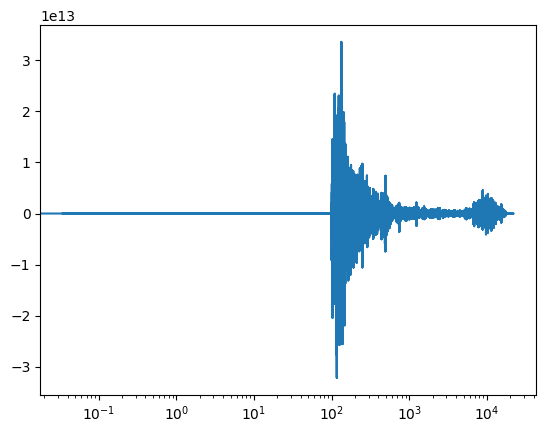

In [17]:
plt.plot(freq_range, freq_dom)
plt.xscale('log')
plt.show()